# Import Packages

In [1]:
#standard package loadout
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# ETL Data for Time Series Analysis

### Crime Dataset

In [2]:
# load crime dataset
crime = pd.read_csv("data/Chicago_Crimes_2012_to_2017.csv")
crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [3]:
#review info in dataset
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [4]:
#include only columns necessary for time series analysis
crimeTimeData = crime[['ID','Date','Community Area','Primary Type','Arrest']]
crimeTimeData.head()

,ID,Date,Community Area,Primary Type,Arrest
0,10508693,05/03/2016 11:40:00 PM,29.0,BATTERY,True
1,10508695,05/03/2016 09:40:00 PM,42.0,BATTERY,False
2,10508697,05/03/2016 11:31:00 PM,25.0,PUBLIC PEACE VIOLATION,False
3,10508698,05/03/2016 10:10:00 PM,25.0,BATTERY,False
4,10508699,05/03/2016 10:00:00 PM,25.0,THEFT,False


In [5]:
#review info in new dataset
crimeTimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 5 columns):
ID                1456714 non-null int64
Date              1456714 non-null object
Community Area    1456674 non-null float64
Primary Type      1456714 non-null object
Arrest            1456714 non-null bool
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 45.8+ MB


In [6]:
#remove rows with no values
crimeTimeCleanData = crimeTimeData.dropna()
crimeTimeCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456674 entries, 0 to 1456713
Data columns (total 5 columns):
ID                1456674 non-null int64
Date              1456674 non-null object
Community Area    1456674 non-null float64
Primary Type      1456674 non-null object
Arrest            1456674 non-null bool
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 57.0+ MB


In [7]:
#convert Arrest to integer
crimeTimeCleanData.Arrest = crimeTimeCleanData.Arrest.astype(int)
crimeTimeCleanData.info()

C:\Users\SnailBait177\Anaconda2\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456674 entries, 0 to 1456713
Data columns (total 5 columns):
ID                1456674 non-null int64
Date              1456674 non-null object
Community Area    1456674 non-null float64
Primary Type      1456674 non-null object
Arrest            1456674 non-null int32
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 61.1+ MB


In [8]:
#convert Date to datetime
crimeTimeCleanData['Date'] = pd.to_datetime(pd.Series(crimeTimeCleanData.Date))
crimeTimeCleanData.info()

C:\Users\SnailBait177\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456674 entries, 0 to 1456713
Data columns (total 5 columns):
ID                1456674 non-null int64
Date              1456674 non-null datetime64[ns]
Community Area    1456674 non-null float64
Primary Type      1456674 non-null object
Arrest            1456674 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 61.1+ MB


In [9]:
#remove timestamp from date
crimeTimeCleanData['Date'] = crimeTimeCleanData['Date'].dt.date
crimeTimeCleanData.head()

C:\Users\SnailBait177\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Date,Community Area,Primary Type,Arrest
0,10508693,2016-05-03,29.0,BATTERY,1
1,10508695,2016-05-03,42.0,BATTERY,0
2,10508697,2016-05-03,25.0,PUBLIC PEACE VIOLATION,0
3,10508698,2016-05-03,25.0,BATTERY,0
4,10508699,2016-05-03,25.0,THEFT,0


In [10]:
# clean data to match timeframe as crime file and not contain geographic areas that have a numeric value of 0
crimeTimeCleanData = crimeTimeCleanData[(crimeTimeCleanData['Community Area'] > 0)]
crimeTimeCleanData.head()

,ID,Date,Community Area,Primary Type,Arrest
0,10508693,2016-05-03,29.0,BATTERY,1
1,10508695,2016-05-03,42.0,BATTERY,0
2,10508697,2016-05-03,25.0,PUBLIC PEACE VIOLATION,0
3,10508698,2016-05-03,25.0,BATTERY,0
4,10508699,2016-05-03,25.0,THEFT,0


In [11]:
# create a copy of Primary Type
crimeTimeCleanData['Crime Type'] = crimeTimeCleanData['Primary Type']
crimeTimeCleanData.head()

,ID,Date,Community Area,Primary Type,Arrest,Crime Type
0,10508693,2016-05-03,29.0,BATTERY,1,BATTERY
1,10508695,2016-05-03,42.0,BATTERY,0,BATTERY
2,10508697,2016-05-03,25.0,PUBLIC PEACE VIOLATION,0,PUBLIC PEACE VIOLATION
3,10508698,2016-05-03,25.0,BATTERY,0,BATTERY
4,10508699,2016-05-03,25.0,THEFT,0,THEFT


In [12]:
# Map Primary Type in Crime Type to Crime Type

crimeTimeCleanData['Crime Type'] = crimeTimeCleanData['Crime Type'].map({'ARSON': 'PROPERTY', 
                                                                 'ASSAULT': 'PERSONS', 
                                                                 'BATTERY': 'PERSONS',
                                                                 'BURGLARY': 'PROPERTY', 
                                                                 'CONCEALED CARRY LICENSE VIOLATION': 'SOCIETY', 
                                                                 'CRIM SEXUAL ASSAULT': 'PERSONS',
                                                                 'CRIMINAL DAMAGE': 'PROPERTY', 
                                                                 'CRIMINAL TRESPASS': 'PROPERTY', 
                                                                 'DECEPTIVE PRACTICE': 'SOCIETY',
                                                                 'GAMBLING': 'SOCIETY', 
                                                                 'HOMICIDE': 'PERSONS', 
                                                                 'HUMAN TRAFFICKING': 'PERSONS',
                                                                 'INTERFERENCE WITH PUBLIC OFFICER': 'PERSONS', 
                                                                 'INTIMIDATION': 'PERSONS', 
                                                                 'KIDNAPPING': 'PERSONS',
                                                                 'LIQUOR LAW VIOLATION': 'SOCIETY', 
                                                                 'MOTOR VEHICLE THEFT': 'PROPERTY', 
                                                                 'NARCOTICS': 'SOCIETY',
                                                                 'NON - CRIMINAL': 'SOCIETY', 
                                                                 'NON-CRIMINAL': 'SOCIETY', 
                                                                 'NON-CRIMINAL (SUBJECT SPECIFIED)': 'SOCIETY',
                                                                 'OBSCENITY': 'SOCIETY', 
                                                                 'OFFENSE INVOLVING CHILDREN': 'PERSONS', 
                                                                 'OTHER NARCOTIC VIOLATION': 'SOCIETY',
                                                                 'OTHER OFFENSE': 'SOCIETY', 
                                                                 'PROSTITUTION': 'SOCIETY', 
                                                                 'PUBLIC INDECENCY': 'SOCIETY',
                                                                 'PUBLIC PEACE VIOLATION': 'SOCIETY', 
                                                                 'ROBBERY': 'PROPERTY', 
                                                                 'SEX OFFENSE': 'PERSONS',
                                                                 'STALKING': 'PERSONS', 
                                                                 'THEFT': 'PROPERTY', 
                                                                 'WEAPONS VIOLATION': 'SOCIETY',
                                                                })
crimeTimeCleanData.head()

,ID,Date,Community Area,Primary Type,Arrest,Crime Type
0,10508693,2016-05-03,29.0,BATTERY,1,PERSONS
1,10508695,2016-05-03,42.0,BATTERY,0,PERSONS
2,10508697,2016-05-03,25.0,PUBLIC PEACE VIOLATION,0,SOCIETY
3,10508698,2016-05-03,25.0,BATTERY,0,PERSONS
4,10508699,2016-05-03,25.0,THEFT,0,PROPERTY


### Socioeconomic Indicators

In [13]:
# load socioeconomic dataset
socioeconomic = pd.read_csv("data/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2010___2014.csv")
socioeconomic.head()

,Community Area,Community Area Number,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and Over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income,Population
0,Rogers Park,1,39.7,7.1,24.0,9.3,16.4,27.2,24323,54991
1,West Ridge,2,44.3,7.6,17.4,10.0,17.1,38.3,23498,71942
2,Uptown,3,29.9,3.8,23.9,10.1,10.8,23.3,37180,56362
3,Lincoln Square,4,23.8,1.6,12.7,7.9,10.6,26.0,39524,39493
4,North Center,5,14.9,0.6,6.1,4.6,6.0,27.8,56893,31867


In [14]:
socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Community Area                                           77 non-null object
Community Area Number                                    77 non-null int64
Hardship Index Score                                     77 non-null float64
Percent of Crowded Housing                               77 non-null float64
Percent of Households With Income Below Poverty Level    77 non-null float64
Unemployment Rate for Population Age 16 and Over         77 non-null float64
Percent Aged 25 and Over with no High School Diploma     77 non-null float64
Percent of Population Under Age 18 and Over Age 64       77 non-null float64
Per Capita Income                                        77 non-null int64
Population                                               77 non-null int64
dtypes: float64(6), int64(3), object(1)
memory usage: 6.1+ KB


In [15]:
# rename community area column labels to match other datasets
socioeconomic = socioeconomic.rename(columns={'Community Area': 'Community Area Name', 'Community Area Number': 'Community Area'})
socioeconomic.head()

,Community Area Name,Community Area,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and Over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income,Population
0,Rogers Park,1,39.7,7.1,24.0,9.3,16.4,27.2,24323,54991
1,West Ridge,2,44.3,7.6,17.4,10.0,17.1,38.3,23498,71942
2,Uptown,3,29.9,3.8,23.9,10.1,10.8,23.3,37180,56362
3,Lincoln Square,4,23.8,1.6,12.7,7.9,10.6,26.0,39524,39493
4,North Center,5,14.9,0.6,6.1,4.6,6.0,27.8,56893,31867


In [16]:
# convert community area to integer
socioeconomic.loc[:,'Community Area'].astype(int)
socioeconomic.head()

,Community Area Name,Community Area,Hardship Index Score,Percent of Crowded Housing,Percent of Households With Income Below Poverty Level,Unemployment Rate for Population Age 16 and Over,Percent Aged 25 and Over with no High School Diploma,Percent of Population Under Age 18 and Over Age 64,Per Capita Income,Population
0,Rogers Park,1,39.7,7.1,24.0,9.3,16.4,27.2,24323,54991
1,West Ridge,2,44.3,7.6,17.4,10.0,17.1,38.3,23498,71942
2,Uptown,3,29.9,3.8,23.9,10.1,10.8,23.3,37180,56362
3,Lincoln Square,4,23.8,1.6,12.7,7.9,10.6,26.0,39524,39493
4,North Center,5,14.9,0.6,6.1,4.6,6.0,27.8,56893,31867


In [17]:
#review info in dataset
socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Community Area Name                                      77 non-null object
Community Area                                           77 non-null int64
Hardship Index Score                                     77 non-null float64
Percent of Crowded Housing                               77 non-null float64
Percent of Households With Income Below Poverty Level    77 non-null float64
Unemployment Rate for Population Age 16 and Over         77 non-null float64
Percent Aged 25 and Over with no High School Diploma     77 non-null float64
Percent of Population Under Age 18 and Over Age 64       77 non-null float64
Per Capita Income                                        77 non-null int64
Population                                               77 non-null int64
dtypes: float64(6), int64(3), object(1)
memory usage: 6.1+ KB


### Abandoned Vehicles

In [18]:
# load abandoned vehicles dataset
vehicle = pd.read_csv("data/311_Service_Requests_-_Abandoned_Vehicles.csv")
vehicle.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,License Plate,Vehicle Make/Model,Vehicle Color,Current Activity,Most Recent Action,...,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
0,01/01/2011,Completed - Dup,01/07/2011,11-00002767,Abandoned Vehicle Complaint,0000000000,Jeep/Cherokee,Red,NaN,NaN,...,60646.0,1.147717e+06,1.937054e+06,39.0,17.0,13.0,NaN,41.983680,-87.731966,"(41.983680361597564, -87.7319663736746)"
1,01/01/2011,Completed - Dup,01/07/2011,11-00002779,Abandoned Vehicle Complaint,REAR PLATE STARTS W/848 AND FRONT PLATE STARTS...,Isuzu,Red,NaN,NaN,...,60646.0,1.147717e+06,1.937054e+06,39.0,17.0,13.0,NaN,41.983680,-87.731966,"(41.983680361597564, -87.7319663736746)"
2,01/01/2011,Completed - Dup,01/20/2011,11-00003001,Abandoned Vehicle Complaint,9381880,Toyota,Silver,NaN,NaN,...,60639.0,1.146056e+06,1.913269e+06,31.0,25.0,20.0,NaN,41.918588,-87.738684,"(41.91858774162382, -87.73868431751842)"
3,01/01/2011,Completed - Dup,01/21/2011,11-00003309,Abandoned Vehicle Complaint,MI S CS860,Jeep/Cherokee,Gold,NaN,NaN,...,60613.0,1.170576e+06,1.928214e+06,46.0,23.0,3.0,NaN,41.958607,-87.648876,"(41.95860696269331, -87.64887590959788)"
4,01/01/2011,Completed - Dup,01/21/2011,11-00003316,Abandoned Vehicle Complaint,MI SCS860,NaN,Gold,NaN,NaN,...,60613.0,1.170576e+06,1.928214e+06,46.0,23.0,3.0,NaN,41.958607,-87.648876,"(41.95860696269331, -87.64887590959788)"


In [19]:
#review info in dataset
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177756 entries, 0 to 177755
Data columns (total 22 columns):
Creation Date                                             177756 non-null object
Status                                                    177756 non-null object
Completion Date                                           176363 non-null object
Service Request Number                                    177756 non-null object
Type of Service Request                                   177756 non-null object
License Plate                                             160656 non-null object
Vehicle Make/Model                                        160537 non-null object
Vehicle Color                                             163248 non-null object
Current Activity                                          163498 non-null object
Most Recent Action                                        162994 non-null object
How Many Days Has the Vehicle Been Reported as Parked?    158240 non-null float

In [20]:
#keep only columns necessary for analysis
vehicleRelevantData = vehicle[['Community Area', 'Creation Date']]
vehicleRelevantData.head()

,Community Area,Creation Date
0,13.0,01/01/2011
1,13.0,01/01/2011
2,20.0,01/01/2011
3,3.0,01/01/2011
4,3.0,01/01/2011


In [21]:
#review info in dataset
vehicleRelevantData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177756 entries, 0 to 177755
Data columns (total 2 columns):
Community Area    177634 non-null float64
Creation Date     177756 non-null object
dtypes: float64(1), object(1)
memory usage: 2.7+ MB


In [22]:
#remove rows with any missing value
vehicleCleanData = vehicleRelevantData.dropna()
vehicleCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177634 entries, 0 to 177755
Data columns (total 2 columns):
Community Area    177634 non-null float64
Creation Date     177634 non-null object
dtypes: float64(1), object(1)
memory usage: 4.1+ MB


In [23]:
#rename date column
vehicleCleanData = vehicleCleanData.rename(columns={'Creation Date': 'Date'})
vehicleCleanData.head()

,Community Area,Date
0,13.0,01/01/2011
1,13.0,01/01/2011
2,20.0,01/01/2011
3,3.0,01/01/2011
4,3.0,01/01/2011


In [24]:
# convert community area to integer
vehicleCleanData['Community Area'] = vehicleCleanData['Community Area'].astype(int)

# convert date to datetime
vehicleCleanData['Date'] = pd.to_datetime(pd.Series(vehicleCleanData.Date))
vehicleCleanData.head()

,Community Area,Date
0,13,2011-01-01
1,13,2011-01-01
2,20,2011-01-01
3,3,2011-01-01
4,3,2011-01-01


In [25]:
#review info
vehicleCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177634 entries, 0 to 177755
Data columns (total 2 columns):
Community Area    177634 non-null int32
Date              177634 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 3.4 MB


In [26]:
# clean data to match timeframe as crime file and not contain geographic areas that have a numeric value of 0
vehicleCleanData = vehicleCleanData[(vehicleCleanData['Community Area'] > 0) & (vehicleCleanData['Date'] >= '2012-01-01')]
vehicleCleanData.head()

,Community Area,Date
27,77,2012-01-01
28,77,2012-01-01
29,16,2012-01-01
30,55,2012-01-01
31,7,2012-01-01


In [27]:
#obtain count of abandonded vehicles by Date and Community Area
vehicleGroupTime = vehicleCleanData.groupby(['Date','Community Area']).size()
vehicleGroupTime.head()

Date        Community Area
2012-01-01  7                 1
            15                1
            16                1
            20                1
            23                1
dtype: int64

In [28]:
#show date in all rows
vehicleGroupTime = vehicleGroupTime.reset_index()
vehicleGroupTime.head()

,Date,Community Area,0
0,2012-01-01,7,1
1,2012-01-01,15,1
2,2012-01-01,16,1
3,2012-01-01,20,1
4,2012-01-01,23,1


In [29]:
#rename count column
vehicleGroupTime = vehicleGroupTime.rename(columns={0: 'Vehicle Count'})
vehicleGroupTime.head()

,Date,Community Area,Vehicle Count
0,2012-01-01,7,1
1,2012-01-01,15,1
2,2012-01-01,16,1
3,2012-01-01,20,1
4,2012-01-01,23,1


### Alley Lights Out

In [30]:
# load alley lights dataset
alleyLight = pd.read_csv("data/311_Service_Requests_-_Alley_Lights_Out.csv")
alleyLight.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,NaN,STATUS,NaN,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,STREET ADDRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2011,Completed - Dup,01/02/2011,11-00001814,Alley Light Out,4316 S SACRAMENTO AVE,60632.0,1.157078e+06,1.875878e+06,14.0,9.0,58.0,41.815176,-87.699332,"(41.81517646745516, -87.69933194705028)"
2,01/01/2011,Completed - Dup,01/02/2011,11-00002131,Alley Light Out,12256 S THROOP ST,60643.0,1.169885e+06,1.823490e+06,34.0,5.0,53.0,41.671148,-87.653870,"(41.67114764355224, -87.65386985854649)"
3,01/01/2011,Completed - Dup,01/02/2011,11-00002721,Alley Light Out,6949 S ROCKWELL ST,60629.0,1.160242e+06,1.858411e+06,18.0,8.0,66.0,41.767180,-87.688205,"(41.76717991767958, -87.68820480368018)"
4,01/01/2011,Completed - Dup,01/02/2011,11-00002731,Alley Light Out,5300 S WASHTENAW AVE,60632.0,1.159272e+06,1.869410e+06,14.0,9.0,63.0,41.797381,-87.691461,"(41.797381114669676, -87.69146089039006)"


In [31]:
#review info
alleyLight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188600 entries, 0 to 188599
Data columns (total 15 columns):
Creation Date              188599 non-null object
Status                     188600 non-null object
Completion Date            182732 non-null object
Service Request Number     188600 non-null object
Type of Service Request    188600 non-null object
Street Address             188597 non-null object
ZIP Code                   188205 non-null float64
X Coordinate               188504 non-null float64
Y Coordinate               188504 non-null float64
Ward                       188551 non-null float64
Police District            188551 non-null float64
Community Area             188551 non-null float64
Latitude                   188504 non-null float64
Longitude                  188504 non-null float64
Location                   188504 non-null object
dtypes: float64(8), object(7)
memory usage: 21.6+ MB


In [32]:
#keep only columns necessary for analysis
alleyLightRelevantData = alleyLight[['Community Area', 'Creation Date']]
alleyLightRelevantData.head()

,Community Area,Creation Date
0,NaN,NaN
1,58.0,01/01/2011
2,53.0,01/01/2011
3,66.0,01/01/2011
4,63.0,01/01/2011


In [33]:
#review info
alleyLightRelevantData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188600 entries, 0 to 188599
Data columns (total 2 columns):
Community Area    188551 non-null float64
Creation Date     188599 non-null object
dtypes: float64(1), object(1)
memory usage: 2.9+ MB


In [34]:
#remove the rows with any missing value
alleyLightCleanData = alleyLightRelevantData.dropna()
alleyLightCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188551 entries, 1 to 188599
Data columns (total 2 columns):
Community Area    188551 non-null float64
Creation Date     188551 non-null object
dtypes: float64(1), object(1)
memory usage: 4.3+ MB


In [35]:
#rename date column
alleyLightCleanData = alleyLightCleanData.rename(columns={'Creation Date': 'Date'})
alleyLightCleanData.head()

,Community Area,Date
1,58.0,01/01/2011
2,53.0,01/01/2011
3,66.0,01/01/2011
4,63.0,01/01/2011
5,53.0,01/01/2011


In [36]:
# convert community area to integer
alleyLightCleanData['Community Area'] = alleyLightCleanData['Community Area'].astype(int)

# convert date to datetime
alleyLightCleanData['Date'] = pd.to_datetime(pd.Series(alleyLightCleanData.Date))
alleyLightCleanData.head()

,Community Area,Date
1,58,2011-01-01
2,53,2011-01-01
3,66,2011-01-01
4,63,2011-01-01
5,53,2011-01-01


In [37]:
#review info
alleyLightCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188551 entries, 1 to 188599
Data columns (total 2 columns):
Community Area    188551 non-null int32
Date              188551 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 3.6 MB


In [38]:
# clean data to match timeframe as crime file and not contain geographic areas that have a numeric value of 0
alleyLightCleanData = alleyLightCleanData[(alleyLightCleanData['Community Area'] > 0) & (alleyLightCleanData['Date'] >= '2012-01-01')]
alleyLightCleanData.head()

,Community Area,Date
22,67,2012-01-01
23,46,2012-01-01
24,22,2012-01-01
25,5,2012-01-01
26,5,2012-01-01


In [39]:
#obtain count of alley lights out by Date and Community Area
alleyLightGroupTime = alleyLightCleanData.groupby(['Date','Community Area']).size()
alleyLightGroupTime.head()

Date        Community Area
2012-01-01  2                 1
            5                 2
            9                 1
            19                1
            22                4
dtype: int64

In [40]:
#show date in all rows
alleyLightGroupTime = alleyLightGroupTime.reset_index()
alleyLightGroupTime.head()

,Date,Community Area,0
0,2012-01-01,2,1
1,2012-01-01,5,2
2,2012-01-01,9,1
3,2012-01-01,19,1
4,2012-01-01,22,4


In [41]:
#rename alley light count column
alleyLightGroupTime = alleyLightGroupTime.rename(columns={0: 'Alley Light Count'})
alleyLightGroupTime.head()

,Date,Community Area,Alley Light Count
0,2012-01-01,2,1
1,2012-01-01,5,2
2,2012-01-01,9,1
3,2012-01-01,19,1
4,2012-01-01,22,4


### Graffiti

In [42]:
# load graffiti dataset
graffiti = pd.read_csv("data/311_Service_Requests_-_Graffiti_Removal.csv")
graffiti.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
0,01/01/2011,Completed - Dup,01/03/2011,11-00002268,Graffiti Removal,Brick - Unpainted,Front,3701 S WOLCOTT AVE,60609.0,1.164295e+06,1.880150e+06,11.0,9.0,59.0,NaN,41.826680,-87.672589,"(41.82667996575031, -87.67258908007462)"
1,01/01/2011,Completed - Dup,01/03/2011,11-00002378,Graffiti Removal,Aluminum Siding,Garage,1802 N TRIPP AVE,60639.0,1.147772e+06,1.911661e+06,30.0,25.0,20.0,NaN,41.913654,-87.732700,"(41.913654239126494, -87.73269978462665)"
2,01/01/2011,Completed - Dup,01/03/2011,11-00002391,Graffiti Removal,Other / Unknown Surface,Front,4150 N KENMORE AVE,60613.0,1.168431e+06,1.927515e+06,46.0,23.0,3.0,34.0,41.958176,-87.656376,"(41.95817637208573, -87.65637593433681)"
3,01/01/2011,Completed - Dup,01/03/2011,11-00002639,Graffiti Removal,"Cement (Sidewalk, Alley, Wall, Curb)",Front,3035 N HOYNE AVE,60618.0,1.161822e+06,1.920144e+06,32.0,19.0,5.0,NaN,41.936957,-87.680558,"(41.93695732658053, -87.68055828418575)"
4,01/01/2011,Completed - Dup,01/04/2011,11-00001746,Graffiti Removal,Metal,Front,4500 N CENTRAL AVE,60630.0,1.138196e+06,1.929380e+06,38.0,16.0,15.0,NaN,41.962397,-87.767451,"(41.96239659175784, -87.76745051301677)"


In [43]:
#review info
graffiti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926792 entries, 0 to 926791
Data columns (total 18 columns):
Creation Date                               926792 non-null object
Status                                      926792 non-null object
Completion Date                             926639 non-null object
Service Request Number                      926792 non-null object
Type of Service Request                     926792 non-null object
What Type of Surface is the Graffiti on?    922099 non-null object
Where is the Graffiti located?              921014 non-null object
Street Address                              926792 non-null object
ZIP Code                                    926097 non-null float64
X Coordinate                                926660 non-null float64
Y Coordinate                                926660 non-null float64
Ward                                        926665 non-null float64
Police District                             926664 non-null float64
Community Are

In [44]:
#keep only columns necessary for analysis
graffitiRelevantData = graffiti[['Community Area', 'Creation Date']]
graffitiRelevantData.head()

,Community Area,Creation Date
0,59.0,01/01/2011
1,20.0,01/01/2011
2,3.0,01/01/2011
3,5.0,01/01/2011
4,15.0,01/01/2011


In [45]:
#review info
graffitiRelevantData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926792 entries, 0 to 926791
Data columns (total 2 columns):
Community Area    926665 non-null float64
Creation Date     926792 non-null object
dtypes: float64(1), object(1)
memory usage: 14.1+ MB


In [46]:
#remove rows with any missing value
graffitiCleanData = graffitiRelevantData.dropna()
graffitiCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926665 entries, 0 to 926791
Data columns (total 2 columns):
Community Area    926665 non-null float64
Creation Date     926665 non-null object
dtypes: float64(1), object(1)
memory usage: 21.2+ MB


In [47]:
#rename date column
graffitiCleanData = graffitiCleanData.rename(columns={'Creation Date': 'Date'})
graffitiCleanData.head()

,Community Area,Date
0,59.0,01/01/2011
1,20.0,01/01/2011
2,3.0,01/01/2011
3,5.0,01/01/2011
4,15.0,01/01/2011


In [48]:
# convert community area to integer
graffitiCleanData['Community Area'] = graffitiCleanData['Community Area'].astype(int)

# convert date to datetime
graffitiCleanData['Date'] = pd.to_datetime(pd.Series(graffitiCleanData.Date))
graffitiCleanData.head()

,Community Area,Date
0,59,2011-01-01
1,20,2011-01-01
2,3,2011-01-01
3,5,2011-01-01
4,15,2011-01-01


In [49]:
#review info
graffitiCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926665 entries, 0 to 926791
Data columns (total 2 columns):
Community Area    926665 non-null int32
Date              926665 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 17.7 MB


In [50]:
# clean data to match timeframe as crime file and not contain geographic areas that have a numeric value of 0
graffitiCleanData = graffitiCleanData[(graffitiCleanData['Community Area'] > 0) & (graffitiCleanData['Date'] >= '2012-01-01')]
graffitiCleanData.head()

,Community Area,Date
45,16,2012-01-01
46,59,2012-01-01
47,60,2012-01-01
48,60,2012-01-01
49,60,2012-01-01


In [51]:
#obtain count of graffiti out by Date and Community Area
graffitiGroupTime = graffitiCleanData.groupby(['Date','Community Area']).size()
graffitiGroupTime.head()

Date        Community Area
2012-01-01  8                 3
            11                1
            14                1
            16                3
            17                1
dtype: int64

In [52]:
#show date in all rows
graffitiGroupTime = graffitiGroupTime.reset_index()
graffitiGroupTime.head()

,Date,Community Area,0
0,2012-01-01,8,3
1,2012-01-01,11,1
2,2012-01-01,14,1
3,2012-01-01,16,3
4,2012-01-01,17,1


In [53]:
#rename graffiti count column
graffitiGroupTime = graffitiGroupTime.rename(columns={0: 'Graffiti Count'})
graffitiGroupTime.head()

,Date,Community Area,Graffiti Count
0,2012-01-01,8,3
1,2012-01-01,11,1
2,2012-01-01,14,1
3,2012-01-01,16,3
4,2012-01-01,17,1


### Potholes

In [54]:
# load pothole dataset
pothole = pd.read_csv("data/311_Service_Requests_-_Pot_Holes_Reported.csv")
pothole.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,01/01/2011,Completed - Dup,01/03/2011,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,1.173863e+06,1.854506e+06,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)"
1,01/01/2011,Completed - Dup,01/03/2011,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,1.150934e+06,1.857221e+06,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)"
2,01/01/2011,Completed - Dup,01/03/2011,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,1.159964e+06,1.915885e+06,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)"
3,01/01/2011,Completed - Dup,01/03/2011,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,1.172963e+06,1.831243e+06,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)"
4,01/01/2011,Completed - Dup,01/03/2011,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,1.175703e+06,1.895045e+06,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)"


In [55]:
#review info
pothole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496020 entries, 0 to 496019
Data columns (total 19 columns):
CREATION DATE                         496020 non-null object
STATUS                                496020 non-null object
COMPLETION DATE                       489508 non-null object
SERVICE REQUEST NUMBER                496020 non-null object
TYPE OF SERVICE REQUEST               496020 non-null object
CURRENT ACTIVITY                      348747 non-null object
MOST RECENT ACTION                    347136 non-null object
NUMBER OF POTHOLES FILLED ON BLOCK    354174 non-null float64
STREET ADDRESS                        496018 non-null object
ZIP                                   493927 non-null float64
X COORDINATE                          495600 non-null float64
Y COORDINATE                          495600 non-null float64
Ward                                  495725 non-null float64
Police District                       495724 non-null float64
Community Area               

In [56]:
#keep only columns necessary for analysis
potholeRelevantData = pothole[['Community Area', 'CREATION DATE']]
potholeRelevantData.head()

,Community Area,CREATION DATE
0,69.0,01/01/2011
1,65.0,01/01/2011
2,22.0,01/01/2011
3,75.0,01/01/2011
4,33.0,01/01/2011


In [57]:
#review info
potholeRelevantData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496020 entries, 0 to 496019
Data columns (total 2 columns):
Community Area    495725 non-null float64
CREATION DATE     496020 non-null object
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [58]:
#remove rows with any missing value
potholeCleanData = potholeRelevantData.dropna()
potholeCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495725 entries, 0 to 496019
Data columns (total 2 columns):
Community Area    495725 non-null float64
CREATION DATE     495725 non-null object
dtypes: float64(1), object(1)
memory usage: 11.3+ MB


In [59]:
#rename date column
potholeCleanData = potholeCleanData.rename(columns={'CREATION DATE': 'Date'})
potholeCleanData.head()

,Community Area,Date
0,69.0,01/01/2011
1,65.0,01/01/2011
2,22.0,01/01/2011
3,75.0,01/01/2011
4,33.0,01/01/2011


In [60]:
# convert community area to integer
potholeCleanData['Community Area'] = potholeCleanData['Community Area'].astype(int)

# convert date to datetime
potholeCleanData['Date'] = pd.to_datetime(pd.Series(potholeCleanData.Date))
potholeCleanData.head()

,Community Area,Date
0,69,2011-01-01
1,65,2011-01-01
2,22,2011-01-01
3,75,2011-01-01
4,33,2011-01-01


In [61]:
#review info
potholeCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495725 entries, 0 to 496019
Data columns (total 2 columns):
Community Area    495725 non-null int32
Date              495725 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 9.5 MB


In [62]:
# clean data to match timeframe as crime file and not contain geographic areas that have a numeric value of 0
potholeCleanData = potholeCleanData[(potholeCleanData['Community Area'] > 0) & (potholeCleanData['Date'] >= '2012-01-01')]
potholeCleanData.head()

,Community Area,Date
58,20,2012-01-01
59,42,2012-01-01
60,16,2012-01-01
61,72,2012-01-01
62,15,2012-01-01


In [63]:
#obtain count of potholes by Date and Community Area
potholeGroupTime = potholeCleanData.groupby(['Date','Community Area']).size()
potholeGroupTime.head()

Date        Community Area
2012-01-01  8                 1
            12                1
            15                1
            16                1
            19                1
dtype: int64

In [64]:
#show date in all rows
potholeGroupTime = potholeGroupTime.reset_index()
potholeGroupTime.head()

,Date,Community Area,0
0,2012-01-01,8,1
1,2012-01-01,12,1
2,2012-01-01,15,1
3,2012-01-01,16,1
4,2012-01-01,19,1


In [65]:
#rename pothole count column
potholeGroupTime = potholeGroupTime.rename(columns={0: 'Pothole Count'})
potholeGroupTime.head()

,Date,Community Area,Pothole Count
0,2012-01-01,8,1
1,2012-01-01,12,1
2,2012-01-01,15,1
3,2012-01-01,16,1
4,2012-01-01,19,1


### Street Lights Out

In [66]:
# load street light out dataset
streetLight = pd.read_csv("data/311_Service_Requests_-_Street_Lights_-_All_Out.csv")
streetLight.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,NaN,STATUS,NaN,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,STREET ADDRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2011,Completed - Dup,01/01/2011,11-00003036,Street Lights - All/Out,5143 S KENNETH AVE,60632.0,1.147567e+06,1.870111e+06,23.0,8.0,57.0,41.799538,-87.734365,"(41.799538203122005, -87.73436542052076)"
2,01/01/2011,Completed - Dup,01/02/2011,11-00003203,Street Lights - All/Out,5400 S SAWYER AVE,60632.0,1.155632e+06,1.868632e+06,14.0,8.0,63.0,41.795321,-87.704831,"(41.795321405681925, -87.704831037907)"
3,01/01/2011,Completed - Dup,01/02/2011,11-00003443,Street Lights - All/Out,1162 W 20TH PL,60608.0,1.168968e+06,1.890237e+06,25.0,12.0,31.0,41.854330,-87.655300,"(41.854330415047066, -87.65530003165237)"
4,01/01/2011,Completed - Dup,01/03/2011,11-00000585,Street Lights - All/Out,736 E 92ND ST,60619.0,1.182750e+06,1.844133e+06,6.0,6.0,44.0,41.727507,-87.606146,"(41.72750696638104, -87.60614646759406)"


In [67]:
#review info
streetLight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278904 entries, 0 to 278903
Data columns (total 15 columns):
Creation Date              278903 non-null object
Status                     278904 non-null object
Completion Date            278762 non-null object
Service Request Number     278904 non-null object
Type of Service Request    278904 non-null object
Street Address             278902 non-null object
ZIP Code                   278333 non-null float64
X Coordinate               278746 non-null float64
Y Coordinate               278746 non-null float64
Ward                       278789 non-null float64
Police District            278789 non-null float64
Community Area             278791 non-null float64
Latitude                   278746 non-null float64
Longitude                  278746 non-null float64
Location                   278746 non-null object
dtypes: float64(8), object(7)
memory usage: 31.9+ MB


In [68]:
#keep only columns necessary for analysis
streetLightRelevantData = streetLight[['Community Area', 'Creation Date']]
streetLightRelevantData.head()

,Community Area,Creation Date
0,NaN,NaN
1,57.0,01/01/2011
2,63.0,01/01/2011
3,31.0,01/01/2011
4,44.0,01/01/2011


In [69]:
#review info
streetLightRelevantData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278904 entries, 0 to 278903
Data columns (total 2 columns):
Community Area    278791 non-null float64
Creation Date     278903 non-null object
dtypes: float64(1), object(1)
memory usage: 4.3+ MB


In [70]:
#remove rows with any missing value
streetLightCleanData = streetLightRelevantData.dropna()
streetLightCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278791 entries, 1 to 278903
Data columns (total 2 columns):
Community Area    278791 non-null float64
Creation Date     278791 non-null object
dtypes: float64(1), object(1)
memory usage: 6.4+ MB


In [71]:
#rename date column
streetLightCleanData = streetLightCleanData.rename(columns={'Creation Date': 'Date'})
streetLightCleanData.head()

,Community Area,Date
1,57.0,01/01/2011
2,63.0,01/01/2011
3,31.0,01/01/2011
4,44.0,01/01/2011
5,61.0,01/01/2011


In [72]:
# convert community area to integer
streetLightCleanData['Community Area'] = streetLightCleanData['Community Area'].astype(int)

# convert date data type to datetime
streetLightCleanData['Date'] = pd.to_datetime(pd.Series(streetLightCleanData.Date))
streetLightCleanData.head()

,Community Area,Date
1,57,2011-01-01
2,63,2011-01-01
3,31,2011-01-01
4,44,2011-01-01
5,61,2011-01-01


In [73]:
#review info
streetLightCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278791 entries, 1 to 278903
Data columns (total 2 columns):
Community Area    278791 non-null int32
Date              278791 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 5.3 MB


In [74]:
# clean data to match timeframe as crime file and not contain geographic areas that have a numeric value of 0
streetLightCleanData = streetLightCleanData[(streetLightCleanData['Community Area'] > 0) & (streetLightCleanData['Date'] >= '2012-01-01')]
streetLightCleanData.head()

,Community Area,Date
148,67,2012-01-01
149,67,2012-01-01
150,64,2012-01-01
151,6,2012-01-01
152,30,2012-01-01


In [75]:
#obtain count of street lights out by Date and Community Area
streetLightGroupTime = streetLightCleanData.groupby(['Date','Community Area']).size()
streetLightGroupTime.head()

Date        Community Area
2012-01-01  2                 2
            4                 3
            6                 3
            7                 2
            12                2
dtype: int64

In [76]:
#show date in all rows
streetLightGroupTime = streetLightGroupTime.reset_index()
streetLightGroupTime.head()

,Date,Community Area,0
0,2012-01-01,2,2
1,2012-01-01,4,3
2,2012-01-01,6,3
3,2012-01-01,7,2
4,2012-01-01,12,2


In [77]:
#rename street light count column
streetLightGroupTime = streetLightGroupTime.rename(columns={0: 'Street Light Count'})
streetLightGroupTime.head()

,Date,Community Area,Street Light Count
0,2012-01-01,2,2
1,2012-01-01,4,3
2,2012-01-01,6,3
3,2012-01-01,7,2
4,2012-01-01,12,2


### Vacant & Abandonded Buildings

In [78]:
# load vacant & abandonded building dataset
building = pd.read_csv("data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")
building.head()

C:\Users\SnailBait177\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SERVICE REQUEST TYPE,SERVICE REQUEST NUMBER,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",...,ADDRESS STREET SUFFIX,ZIP CODE,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,LATITUDE,LONGITUDE,Location
0,SERVICE REQUEST TYPE,SERVICE REQUEST #,NaN,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CH...",IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY PO...",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,NaN,NaN,...,ADDRESS STREET SUFFIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vacant/Abandoned Building,08-00109075,01/18/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ST,60613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vacant/Abandoned Building,08-00577896,04/03/2008,NaN,NaN,Building is Open / Unsecure,NaN,Vacant,NaN,NaN,...,ST,60621.0,1.170179e+06,1.858859e+06,17.0,7.0,68.0,41.768198,-87.651771,"(41.76819814695611, -87.65177097869127)"
3,Vacant/Abandoned Building,08-00588295,04/05/2008,NaN,NaN,Building is Open / Unsecure,"GARAGE, VAGRANTS BROKE INTO GARAGE AND USE IT ...",Vacant,NaN,True,...,AVE,60619.0,1.182657e+06,1.850683e+06,6.0,6.0,44.0,41.745482,-87.606287,"(41.745482414802325, -87.60628681474407)"
4,Vacant/Abandoned Building,08-01476976,07/30/2008,NaN,NaN,Building is Open / Unsecure,REAR,Vacant,NaN,NaN,...,AVE,60621.0,1.174523e+06,1.857609e+06,6.0,7.0,68.0,41.764674,-87.635884,"(41.764673747551555, -87.63588403606937)"


In [79]:
#review info
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61263 entries, 0 to 61262
Data columns (total 23 columns):
SERVICE REQUEST TYPE                                                     61263 non-null object
SERVICE REQUEST NUMBER                                                   61263 non-null object
DATE SERVICE REQUEST WAS RECEIVED                                        61262 non-null object
LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).    52997 non-null object
IS THE BUILDING DANGEROUS OR HAZARDOUS?                                  1 non-null object
IS BUILDING OPEN OR BOARDED?                                             53514 non-null object
IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?                       32623 non-null object
IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?                            53522 non-null object
IS THE BUILDING VACANT DUE TO FIRE?                                      52659 non-null object
ANY PEOPLE USING PROPERTY? (HOMELESS, CH

In [80]:
#keep only columns necessary for analysis
buildingRelevantData = building[['Community Area', 'DATE SERVICE REQUEST WAS RECEIVED']]
buildingRelevantData.head()

,Community Area,DATE SERVICE REQUEST WAS RECEIVED
0,NaN,NaN
1,NaN,01/18/2008
2,68.0,04/03/2008
3,44.0,04/05/2008
4,68.0,07/30/2008


In [81]:
#review info
buildingRelevantData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61263 entries, 0 to 61262
Data columns (total 2 columns):
Community Area                       61223 non-null float64
DATE SERVICE REQUEST WAS RECEIVED    61262 non-null object
dtypes: float64(1), object(1)
memory usage: 957.3+ KB


In [82]:
#remove rows with any missing value
buildingCleanData = buildingRelevantData.dropna()
buildingCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61223 entries, 2 to 61262
Data columns (total 2 columns):
Community Area                       61223 non-null float64
DATE SERVICE REQUEST WAS RECEIVED    61223 non-null object
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [83]:
#rename date column
buildingCleanData = buildingCleanData.rename(columns={'DATE SERVICE REQUEST WAS RECEIVED': 'Date'})
buildingCleanData.head()

,Community Area,Date
2,68.0,04/03/2008
3,44.0,04/05/2008
4,68.0,07/30/2008
5,67.0,08/07/2008
6,23.0,08/12/2008


In [84]:
# convert community area to integer
buildingCleanData['Community Area'] = buildingCleanData['Community Area'].astype(int)

# convert date to datetime
buildingCleanData['Date'] = pd.to_datetime(pd.Series(buildingCleanData.Date))
buildingCleanData.head()

,Community Area,Date
2,68,2008-04-03
3,44,2008-04-05
4,68,2008-07-30
5,67,2008-08-07
6,23,2008-08-12


In [85]:
#review info
buildingCleanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61223 entries, 2 to 61262
Data columns (total 2 columns):
Community Area    61223 non-null int32
Date              61223 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.2 MB


In [86]:
# clean data to match timeframe as crime file and not contain geographic areas that have a numeric value of 0
buildingCleanData = buildingCleanData[(buildingCleanData['Community Area'] > 0) & (buildingCleanData['Date'] >= '2012-01-01')]
buildingCleanData.head()

,Community Area,Date
20313,68,2012-01-06
20364,67,2012-01-06
20414,66,2012-01-06
20513,71,2012-01-06
20589,67,2012-01-27


In [87]:
#obtain count of abandoned buildings by Date and Community Area
buildingGroupTime = buildingCleanData.groupby(['Date','Community Area']).size()
buildingGroupTime.head()

Date        Community Area
2012-01-01  15                1
            18                1
            19                1
            64                1
            69                1
dtype: int64

In [88]:
#show date in all rows
buildingGroupTime = buildingGroupTime.reset_index()
buildingGroupTime.head()

,Date,Community Area,0
0,2012-01-01,15,1
1,2012-01-01,18,1
2,2012-01-01,19,1
3,2012-01-01,64,1
4,2012-01-01,69,1


In [89]:
#rename building count column
buildingGroupTime = buildingGroupTime.rename(columns={0: 'Building Count'})
buildingGroupTime.head()

,Date,Community Area,Building Count
0,2012-01-01,15,1
1,2012-01-01,18,1
2,2012-01-01,19,1
3,2012-01-01,64,1
4,2012-01-01,69,1


In [90]:
#load transformed geographic descriptors data from ETL in step 1
geographicDescriptors = pd.read_csv("data/geographicDescriptors.csv")

## District Data

#### There are 77 community areas within the datasets used in this analysis.  To reduce the number of variables used in analytics, the community areas are being categorized into their corresponding districts.  District information was obtained from the following website to roll up the community areas:

http://www.thechicago77.com/chicago-neighborhoods/

In [91]:
#load district info
districts = pd.read_excel("data/Districts.xlsx", sheetname="Get & Transform")
districts.head()

,District,Community Area
0,Far North Side,Rogers Park
1,Far North Side,West Ridge
2,Far North Side,Uptown
3,Far North Side,Lincoln Square
4,Far North Side,Edison Park


In [92]:
#change column name to match socioeconomic dataset for join
districts = districts.rename(columns={'Community Area': 'Community Area Name'})
districts.head()

,District,Community Area Name
0,Far North Side,Rogers Park
1,Far North Side,West Ridge
2,Far North Side,Uptown
3,Far North Side,Lincoln Square
4,Far North Side,Edison Park


## Join Tables

In [93]:
#join districts to socioeconomic data
socioeconomicDistricts = geographicDescriptors.merge(districts, on='Community Area Name')

#review merged tables
socioeconomicDistricts

,Unnamed: 0,Community Area Name,Community Area,Pop,Income,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,...,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimePerson,CrimeProperty,CrimeSociety,CrimeTotal,District


In [94]:
#merge not successful; clean data - remove spaces from districts table
districts['Community Area Name'] = districts['Community Area Name'].str.strip()

In [95]:
#join districts to socioeconomic data
socioeconomicDistricts = geographicDescriptors.merge(districts, on='Community Area Name')

#review merged tables
socioeconomicDistricts

,Unnamed: 0,Community Area Name,Community Area,Pop,Income,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,...,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimePerson,CrimeProperty,CrimeSociety,CrimeTotal,District
0,0,Rogers Park,1,54991,24323,0.240,0.071,0.093,0.164,0.272,...,0.051117,0.025059,0.024095,0.119947,0.178193,0.109763,0.182175,0.080850,0.372788,Far North Side
1,1,West Ridge,2,71942,23498,0.174,0.076,0.100,0.171,0.383,...,0.066303,0.034375,0.029204,0.163423,0.220845,0.063245,0.135651,0.047636,0.246532,Far North Side
2,2,Uptown,3,56362,37180,0.239,0.038,0.101,0.108,0.233,...,0.030819,0.022586,0.014779,0.073667,0.189046,0.090469,0.179518,0.091462,0.361449,Far North Side
3,3,Lincoln Square,4,39493,39524,0.127,0.016,0.079,0.106,0.260,...,0.056972,0.040817,0.026866,0.141190,0.466589,0.060745,0.150001,0.048920,0.259666,Far North Side
4,4,North Center,5,31867,56893,0.061,0.006,0.046,0.060,0.278,...,0.069633,0.046663,0.032008,0.152101,0.533436,0.037374,0.174412,0.039006,0.250792,North Side
5,5,Lakeview,6,94368,61610,0.113,0.010,0.042,0.024,0.176,...,0.025263,0.022402,0.018354,0.098042,0.245433,0.060656,0.223179,0.055665,0.339501,North Side
6,6,Lincoln Park,7,64116,68682,0.125,0.007,0.048,0.031,0.227,...,0.027170,0.039647,0.021399,0.132167,0.224546,0.041846,0.251950,0.045231,0.339026,North Side
7,7,Near North Side,8,80484,86068,0.122,0.013,0.067,0.024,0.226,...,0.010810,0.028788,0.005678,0.114147,0.130237,0.105126,0.395172,0.124546,0.624845,Central
8,8,Edison Park,9,11187,40833,0.029,0.019,0.067,0.078,0.363,...,0.046483,0.064539,0.061947,0.359614,0.017431,0.031912,0.064986,0.031197,0.128095,Far North Side
9,9,Norwood Park,10,37023,35120,0.076,0.011,0.084,0.078,0.397,...,0.056532,0.070011,0.058369,0.308214,0.034762,0.042109,0.098209,0.037355,0.177673,Far North Side


In [96]:
#verify all community areas were successfully joined; count should be 77

socioeconomicDistricts.count()

Unnamed: 0             77
Community Area Name    77
Community Area         77
Pop                    77
Income                 77
Poverty                77
CrowdedHousing         77
Unemployed             77
NoDiploma              77
Dependency             77
Hardship               77
VacantBuildings        77
AbandonedVehicles      77
StreetLights           77
AlleyLights            77
Potholes               77
Graffiti               77
CrimePerson            77
CrimeProperty          77
CrimeSociety           77
CrimeTotal             77
District               77
dtype: int64

In [97]:
#join socioeconomic district data with city data
crimePopulation = crimeTimeCleanData.merge(socioeconomicDistricts, on= 'Community Area')

# review merged tables
crimePopulation.head()

,ID,Date,Community Area,Primary Type,Arrest,Crime Type,Unnamed: 0,Community Area Name,Pop,Income,...,AbandonedVehicles,StreetLights,AlleyLights,Potholes,Graffiti,CrimePerson,CrimeProperty,CrimeSociety,CrimeTotal,District
0,10508693,2016-05-03,29,BATTERY,1,PERSONS,28,North Lawndale,35912,11686,...,0.053492,0.117426,0.052322,0.129316,0.112469,0.397555,0.457646,0.429912,1.285114,West Side
1,10448396,2016-03-14,29,BURGLARY,0,PROPERTY,28,North Lawndale,35912,11686,...,0.053492,0.117426,0.052322,0.129316,0.112469,0.397555,0.457646,0.429912,1.285114,West Side
2,10495378,2016-04-22,29,WEAPONS VIOLATION,1,SOCIETY,28,North Lawndale,35912,11686,...,0.053492,0.117426,0.052322,0.129316,0.112469,0.397555,0.457646,0.429912,1.285114,West Side
3,20859,2013-05-01,29,HOMICIDE,1,PERSONS,28,North Lawndale,35912,11686,...,0.053492,0.117426,0.052322,0.129316,0.112469,0.397555,0.457646,0.429912,1.285114,West Side
4,10508736,2016-05-04,29,ASSAULT,1,PERSONS,28,North Lawndale,35912,11686,...,0.053492,0.117426,0.052322,0.129316,0.112469,0.397555,0.457646,0.429912,1.285114,West Side


In [98]:
#review info
crimePopulation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456661 entries, 0 to 1456660
Data columns (total 27 columns):
ID                     1456661 non-null int64
Date                   1456661 non-null object
Community Area         1456661 non-null object
Primary Type           1456661 non-null object
Arrest                 1456661 non-null int32
Crime Type             1456661 non-null object
Unnamed: 0             1456661 non-null int64
Community Area Name    1456661 non-null object
Pop                    1456661 non-null int64
Income                 1456661 non-null int64
Poverty                1456661 non-null float64
CrowdedHousing         1456661 non-null float64
Unemployed             1456661 non-null float64
NoDiploma              1456661 non-null float64
Dependency             1456661 non-null float64
Hardship               1456661 non-null float64
VacantBuildings        1456661 non-null float64
AbandonedVehicles      1456661 non-null float64
StreetLights           1456661 non-nul

In [99]:
# convert dates to pandas datetime format and set index to date
crimePopulation['Date'] = pd.to_datetime(pd.Series(crimePopulation.Date))
crimePopulation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456661 entries, 0 to 1456660
Data columns (total 27 columns):
ID                     1456661 non-null int64
Date                   1456661 non-null datetime64[ns]
Community Area         1456661 non-null object
Primary Type           1456661 non-null object
Arrest                 1456661 non-null int32
Crime Type             1456661 non-null object
Unnamed: 0             1456661 non-null int64
Community Area Name    1456661 non-null object
Pop                    1456661 non-null int64
Income                 1456661 non-null int64
Poverty                1456661 non-null float64
CrowdedHousing         1456661 non-null float64
Unemployed             1456661 non-null float64
NoDiploma              1456661 non-null float64
Dependency             1456661 non-null float64
Hardship               1456661 non-null float64
VacantBuildings        1456661 non-null float64
AbandonedVehicles      1456661 non-null float64
StreetLights           1456661

In [100]:
#join crime population with city data
crimeDescPopulation = crimePopulation.merge(vehicleGroupTime, on= ['Date','Community Area'],how='left')
crimeDescPopulation = crimeDescPopulation.merge(alleyLightGroupTime, on= ['Date','Community Area'],how='left')
crimeDescPopulation = crimeDescPopulation.merge(graffitiGroupTime, on= ['Date','Community Area'],how='left')
crimeDescPopulation = crimeDescPopulation.merge(potholeGroupTime, on= ['Date','Community Area'],how='left')
crimeDescPopulation = crimeDescPopulation.merge(streetLightGroupTime, on= ['Date','Community Area'],how='left')
crimeDescPopulation = crimeDescPopulation.merge(buildingGroupTime, on= ['Date','Community Area'],how='left')

#review merged tables
crimeDescPopulation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456661 entries, 0 to 1456660
Data columns (total 33 columns):
ID                     1456661 non-null int64
Date                   1456661 non-null datetime64[ns]
Community Area         1456661 non-null object
Primary Type           1456661 non-null object
Arrest                 1456661 non-null int32
Crime Type             1456661 non-null object
Unnamed: 0             1456661 non-null int64
Community Area Name    1456661 non-null object
Pop                    1456661 non-null int64
Income                 1456661 non-null int64
Poverty                1456661 non-null float64
CrowdedHousing         1456661 non-null float64
Unemployed             1456661 non-null float64
NoDiploma              1456661 non-null float64
Dependency             1456661 non-null float64
Hardship               1456661 non-null float64
VacantBuildings        1456661 non-null float64
AbandonedVehicles      1456661 non-null float64
StreetLights           1456661

In [101]:
#add days of week to crime population
crimeDescPopulation['Day of Week'] = crimeDescPopulation['Date'].dt.weekday_name
crimeDescPopulation.head()

,ID,Date,Community Area,Primary Type,Arrest,Crime Type,Unnamed: 0,Community Area Name,Pop,Income,...,CrimeSociety,CrimeTotal,District,Vehicle Count,Alley Light Count,Graffiti Count,Pothole Count,Street Light Count,Building Count,Day of Week
0,10508693,2016-05-03,29,BATTERY,1,PERSONS,28,North Lawndale,35912,11686,...,0.429912,1.285114,West Side,1.0,1.0,4.0,1.0,NaN,NaN,Tuesday
1,10448396,2016-03-14,29,BURGLARY,0,PROPERTY,28,North Lawndale,35912,11686,...,0.429912,1.285114,West Side,4.0,1.0,1.0,9.0,2.0,NaN,Monday
2,10495378,2016-04-22,29,WEAPONS VIOLATION,1,SOCIETY,28,North Lawndale,35912,11686,...,0.429912,1.285114,West Side,1.0,2.0,1.0,2.0,2.0,1.0,Friday
3,20859,2013-05-01,29,HOMICIDE,1,PERSONS,28,North Lawndale,35912,11686,...,0.429912,1.285114,West Side,1.0,1.0,NaN,2.0,6.0,NaN,Wednesday
4,10508736,2016-05-04,29,ASSAULT,1,PERSONS,28,North Lawndale,35912,11686,...,0.429912,1.285114,West Side,1.0,NaN,3.0,4.0,NaN,1.0,Wednesday


In [102]:
# convert dates to pandas datetime format and set index to date
crimeDescPopulation.Date = pd.to_datetime(crimeDescPopulation.Date, format='%m/%d/%Y %I:%M:%S %p')
crimeDescPopulation.index = pd.DatetimeIndex(crimeDescPopulation.Date)

In [103]:
#review info
crimeDescPopulation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456661 entries, 2016-05-03 to 2017-01-18
Data columns (total 34 columns):
ID                     1456661 non-null int64
Date                   1456661 non-null datetime64[ns]
Community Area         1456661 non-null object
Primary Type           1456661 non-null object
Arrest                 1456661 non-null int32
Crime Type             1456661 non-null object
Unnamed: 0             1456661 non-null int64
Community Area Name    1456661 non-null object
Pop                    1456661 non-null int64
Income                 1456661 non-null int64
Poverty                1456661 non-null float64
CrowdedHousing         1456661 non-null float64
Unemployed             1456661 non-null float64
NoDiploma              1456661 non-null float64
Dependency             1456661 non-null float64
Hardship               1456661 non-null float64
VacantBuildings        1456661 non-null float64
AbandonedVehicles      1456661 non-null float64
StreetLights   

In [104]:
#change NaN values in socio data columns to zero

crimeDescPopulation=crimeDescPopulation.fillna({'Vehicle Count':0})
crimeDescPopulation=crimeDescPopulation.fillna({'Alley Light Count':0})
crimeDescPopulation=crimeDescPopulation.fillna({'Graffiti Count':0})
crimeDescPopulation=crimeDescPopulation.fillna({'Pothole Count':0})
crimeDescPopulation=crimeDescPopulation.fillna({'Street Light Count':0})
crimeDescPopulation=crimeDescPopulation.fillna({'Building Count':0})
crimeDescPopulation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456661 entries, 2016-05-03 to 2017-01-18
Data columns (total 34 columns):
ID                     1456661 non-null int64
Date                   1456661 non-null datetime64[ns]
Community Area         1456661 non-null object
Primary Type           1456661 non-null object
Arrest                 1456661 non-null int32
Crime Type             1456661 non-null object
Unnamed: 0             1456661 non-null int64
Community Area Name    1456661 non-null object
Pop                    1456661 non-null int64
Income                 1456661 non-null int64
Poverty                1456661 non-null float64
CrowdedHousing         1456661 non-null float64
Unemployed             1456661 non-null float64
NoDiploma              1456661 non-null float64
Dependency             1456661 non-null float64
Hardship               1456661 non-null float64
VacantBuildings        1456661 non-null float64
AbandonedVehicles      1456661 non-null float64
StreetLights   

In [105]:
#remove unnecessary columns
crimeDescPopulation = crimeDescPopulation.drop(['Unnamed: 0'],axis=1)
crimeDescPopulation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456661 entries, 2016-05-03 to 2017-01-18
Data columns (total 33 columns):
ID                     1456661 non-null int64
Date                   1456661 non-null datetime64[ns]
Community Area         1456661 non-null object
Primary Type           1456661 non-null object
Arrest                 1456661 non-null int32
Crime Type             1456661 non-null object
Community Area Name    1456661 non-null object
Pop                    1456661 non-null int64
Income                 1456661 non-null int64
Poverty                1456661 non-null float64
CrowdedHousing         1456661 non-null float64
Unemployed             1456661 non-null float64
NoDiploma              1456661 non-null float64
Dependency             1456661 non-null float64
Hardship               1456661 non-null float64
VacantBuildings        1456661 non-null float64
AbandonedVehicles      1456661 non-null float64
StreetLights           1456661 non-null float64
AlleyLights  

In [106]:
# save to csv
crimeDescPopulation.to_csv("data/crimeDescPopulation.csv")

## Time Series Analysis

#### Time series analytics were completed to determine if there were pique times in which crimes occur.

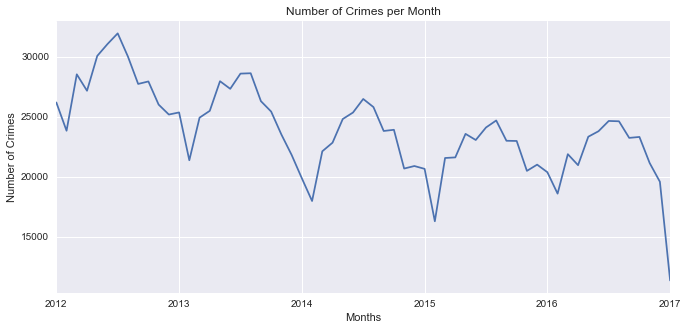

In [107]:
#plot number of crimes per month

plt.figure(figsize=(11,5))
crimeDescPopulation.resample('M').size().plot(legend=False)
plt.title('Number of Crimes per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.show()

In [108]:
#remove columns not necessary for correlation analysis
crimeCorrPopulation = crimeDescPopulation.drop(['ID'],axis=1)
crimeCorrPopulation.corr()

,Arrest,Pop,Income,Poverty,CrowdedHousing,Unemployed,NoDiploma,Dependency,Hardship,VacantBuildings,...,CrimePerson,CrimeProperty,CrimeSociety,CrimeTotal,Vehicle Count,Alley Light Count,Graffiti Count,Pothole Count,Street Light Count,Building Count
Arrest,1.000000,-0.000798,-0.087540,0.126878,0.077883,0.099482,0.076215,0.088603,0.112810,0.095833,...,0.128477,0.067482,0.151743,0.127133,-0.009097,0.013563,-0.038501,0.019193,0.038216,0.052972
Pop,-0.000798,1.000000,0.274267,-0.261685,0.079224,-0.305358,-0.012653,-0.346223,-0.230499,-0.322262,...,-0.294834,-0.253741,-0.193234,-0.273547,0.301166,0.237942,0.285502,0.221598,0.165633,0.036873
Income,-0.087540,0.274267,1.000000,-0.662181,-0.543946,-0.705777,-0.729136,-0.851809,-0.921807,-0.514760,...,-0.501152,0.108076,-0.345051,-0.249250,-0.060256,-0.178785,0.116072,0.045588,-0.124627,-0.222765
Poverty,0.126878,-0.261685,-0.662181,1.000000,0.393203,0.811077,0.494860,0.615529,0.805687,0.669061,...,0.866295,0.409341,0.701132,0.716038,-0.095332,0.041823,-0.231532,-0.079300,0.088413,0.251793
CrowdedHousing,0.077883,0.079224,-0.543946,0.393203,1.000000,0.164542,0.868947,0.373229,0.679896,0.067991,...,0.082494,-0.245620,0.177389,-0.006921,0.091989,0.051828,0.193882,-0.010136,0.016303,0.063940
Unemployed,0.099482,-0.305358,-0.705777,0.811077,0.164542,1.000000,0.407133,0.778771,0.791647,0.846337,...,0.835469,0.366774,0.523204,0.620891,-0.085655,0.136965,-0.319273,-0.058237,0.156243,0.338930
NoDiploma,0.076215,-0.012653,-0.729136,0.494860,0.868947,0.407133,1.000000,0.580751,0.832684,0.260923,...,0.188975,-0.257330,0.162608,0.017188,0.089265,0.109252,0.149657,-0.024597,0.057709,0.139191
Dependency,0.088603,-0.346223,-0.851809,0.615529,0.373229,0.778771,0.580751,1.000000,0.862733,0.591974,...,0.576523,-0.040633,0.408663,0.325642,-0.022898,0.170415,-0.275922,-0.060125,0.131275,0.237874
Hardship,0.112810,-0.230499,-0.921807,0.805687,0.679896,0.791647,0.832684,0.862733,1.000000,0.603909,...,0.619331,0.019950,0.467274,0.386744,0.009348,0.143579,-0.123237,-0.056144,0.118789,0.257176
VacantBuildings,0.095833,-0.322262,-0.514760,0.669061,0.067991,0.846337,0.260923,0.591974,0.603909,1.000000,...,0.789442,0.420994,0.595520,0.655760,-0.116582,0.084939,-0.282908,-0.066747,0.129309,0.363282


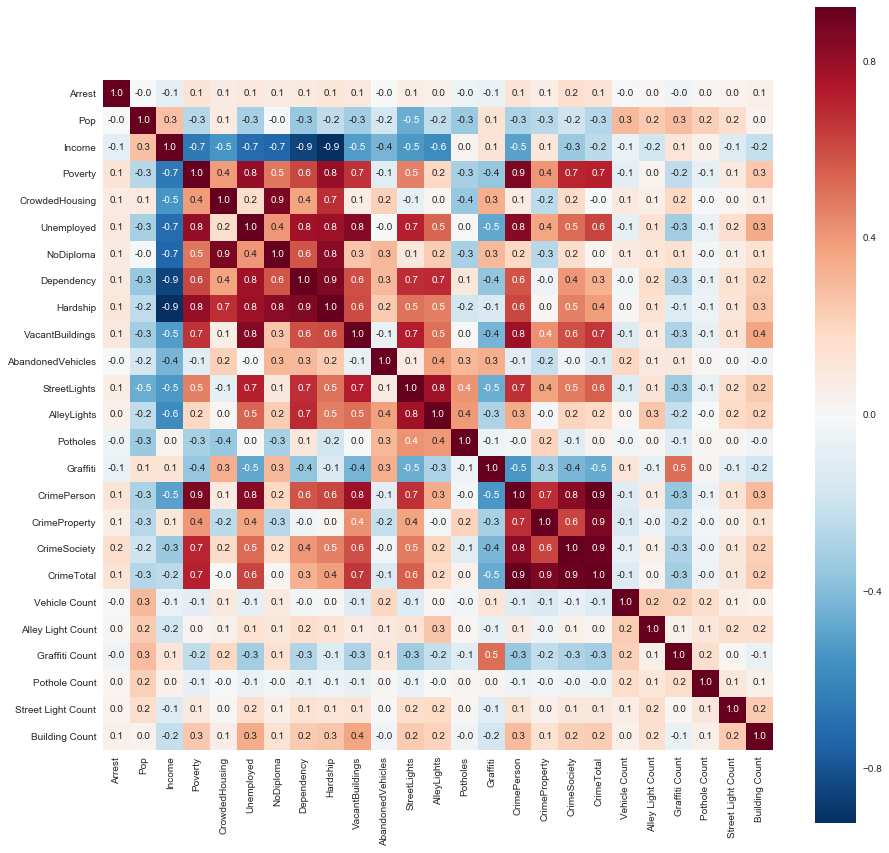

In [109]:
#heatmap to highlight strong correlations

plt.figure(figsize=(15,15))
sns.heatmap(crimeCorrPopulation.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

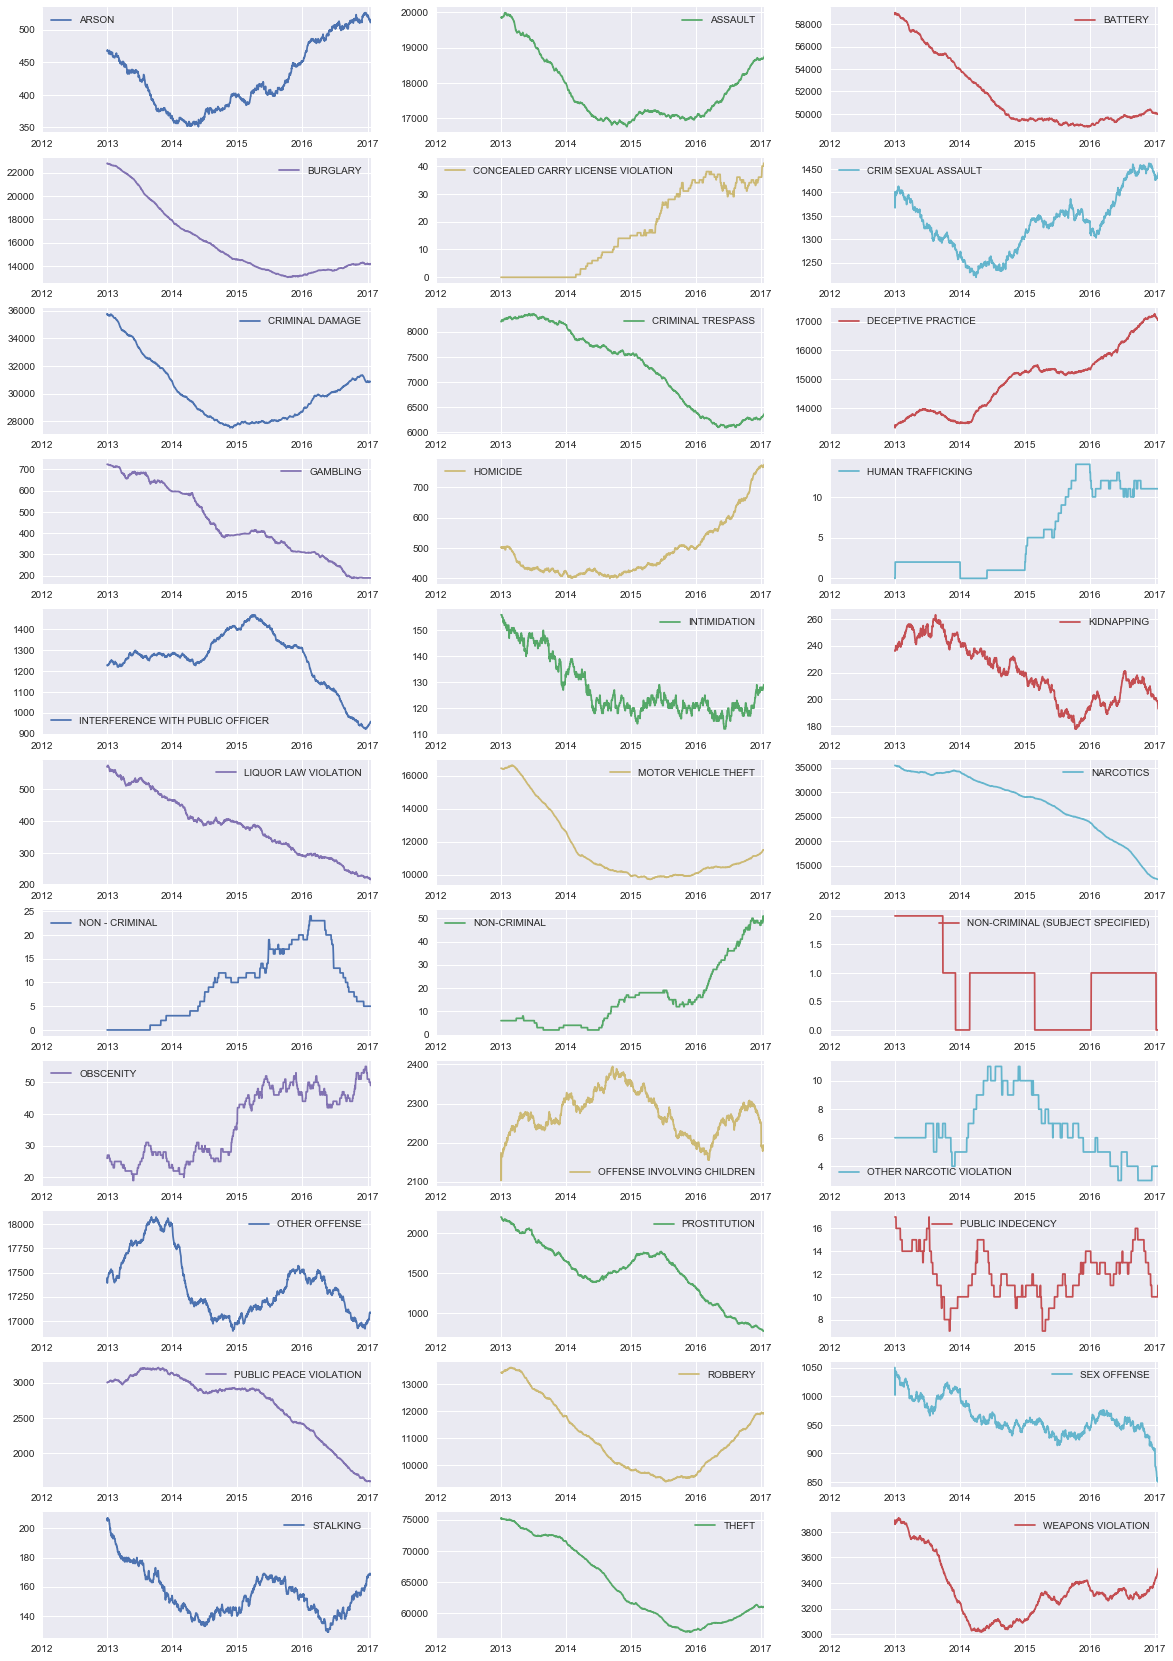

In [110]:
#plot crime trends by primary type over time

crimesPrimary = crimeDescPopulation.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimeDescPopulation.index.date, fill_value=0)
crimesPrimary.index = pd.DatetimeIndex(crimesPrimary.index)
plo = crimesPrimary.rolling(365).sum().plot(figsize=(20, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

#### Notable findings:

1. There were steady decreases for several crime types until the year 2016 when they began to rise:  assault, burglary, criminal damage, motor vehicle theft, robbery, and theft.
2. Some of the most significant increases in crime occurred in obscenities, homicide, concealed carry license violations, sexual assault, arson, and human trafficking.
3. Crimes in narcotics, prostitution, and public peace violations appear to be decreasing without any upward trends through 2017 so far.

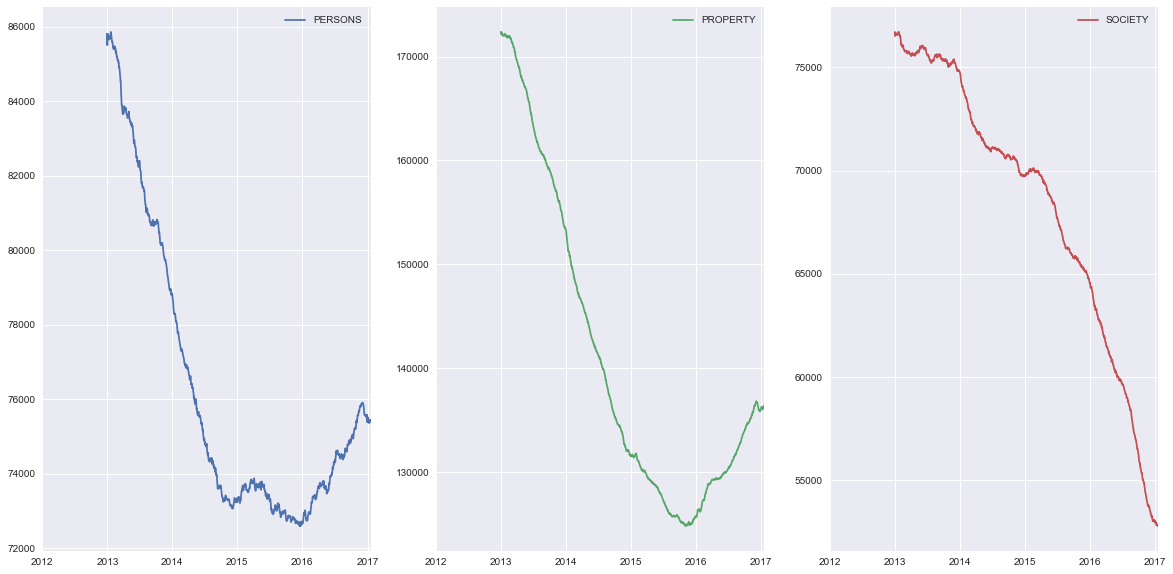

In [111]:
#plot crime trends by rolled up crime type over time

crimesGrouped = crimeDescPopulation.pivot_table('ID', aggfunc=np.size, columns='Crime Type', index=crimeDescPopulation.index.date, fill_value=0)
crimesGrouped.index = pd.DatetimeIndex(crimesGrouped.index)
plo = crimesGrouped.rolling(365).sum().plot(figsize=(20, 10), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [112]:
#count of crimes by days of week

crimeDescPopulation.groupby(['Day of Week']).count()

,ID,Date,Community Area,Primary Type,Arrest,Crime Type,Community Area Name,Pop,Income,Poverty,...,CrimeProperty,CrimeSociety,CrimeTotal,District,Vehicle Count,Alley Light Count,Graffiti Count,Pothole Count,Street Light Count,Building Count
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,218635,218635,218635,218635,218635,218635,218635,218635,218635,218635,...,218635,218635,218635,218635,218635,218635,218635,218635,218635,218635
Monday,205755,205755,205755,205755,205755,205755,205755,205755,205755,205755,...,205755,205755,205755,205755,205755,205755,205755,205755,205755,205755
Saturday,209735,209735,209735,209735,209735,209735,209735,209735,209735,209735,...,209735,209735,209735,209735,209735,209735,209735,209735,209735,209735
Sunday,202207,202207,202207,202207,202207,202207,202207,202207,202207,202207,...,202207,202207,202207,202207,202207,202207,202207,202207,202207,202207
Thursday,205841,205841,205841,205841,205841,205841,205841,205841,205841,205841,...,205841,205841,205841,205841,205841,205841,205841,205841,205841,205841
Tuesday,206122,206122,206122,206122,206122,206122,206122,206122,206122,206122,...,206122,206122,206122,206122,206122,206122,206122,206122,206122,206122
Wednesday,208366,208366,208366,208366,208366,208366,208366,208366,208366,208366,...,208366,208366,208366,208366,208366,208366,208366,208366,208366,208366


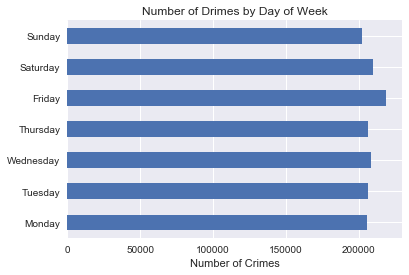

In [113]:
#visual of crimes by day

days = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
crimeDescPopulation.groupby([crimeDescPopulation.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of Crimes')
plt.title('Number of Drimes by Day of Week')
plt.show()

#### It does not appear the crime significantly increases or decreases depending on the day of the week.

In [114]:
#crimes by month

crimeDescPopulation.groupby([crimeDescPopulation.index.month]).size()

Date
1     123798
2      98056
3     119006
4     118060
5     129731
6     130573
7     135760
8     133737
9     124067
10    123567
11    111831
12    108475
dtype: int64

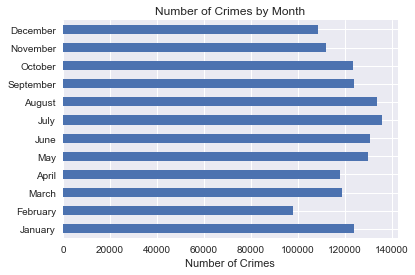

In [115]:
#visual of crimes by month

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
crimeDescPopulation.groupby([crimeDescPopulation.index.month]).size().plot(kind='barh')
plt.ylabel('')
plt.xlabel('Number of Crimes')
plt.yticks(np.arange(12), months)
plt.title('Number of Crimes by Month')
plt.show()

#### Crimes appear to be more significant in number during the summer months but are otherwise consistent month to month.  The one exception is February, which appears to experience fewer crimes during the year.  Perhaps this is due to all the love in the air during the month of St. Valentine!